## Predicting H1N1 and Seasonal Flu Vaccines

In [1]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler \
    , OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score \
    ,classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# Loading the dataset.
df_train_set_features = pd.read_csv('training_set_features.csv')
df_train_set_labels = pd.read_csv('training_set_labels.csv')
df_test_set_features = pd.read_csv('test_set_features.csv')

In [3]:
df_train_set_features.shape, df_train_set_labels.shape, df_test_set_features.shape

((26707, 36), (26707, 3), (26708, 36))

In [4]:
df_train_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
df_train_set_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
df_train_set_features['respondent_id'].dtypes

dtype('int64')

In [7]:
df_train_set_labels['respondent_id'].dtypes

dtype('int64')

In [8]:
# Merging the features and labels on the common identifier on 
# 'respondent_id'.
df_train_data = df_train_set_features.merge(df_train_set_labels, on='respondent_id')
df_train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [9]:
df_train_data.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


In [10]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
# Checking for duplicates.
duplicates = df_train_data[df_train_data.duplicated()]

In [12]:
# ID entries must be unique.
df_train_data['respondent_id'].nunique()

26707

In [13]:
# Descriptive statistics for numerical columns.
df_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [14]:
# Exploring missing values.
df_train_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [15]:
# Calculating percentage of the missing values.
df_train_data.isnull().sum()/df_train_data.shape[0]*100

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [16]:
# Looking for unique values in age group column.
df_train_data['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

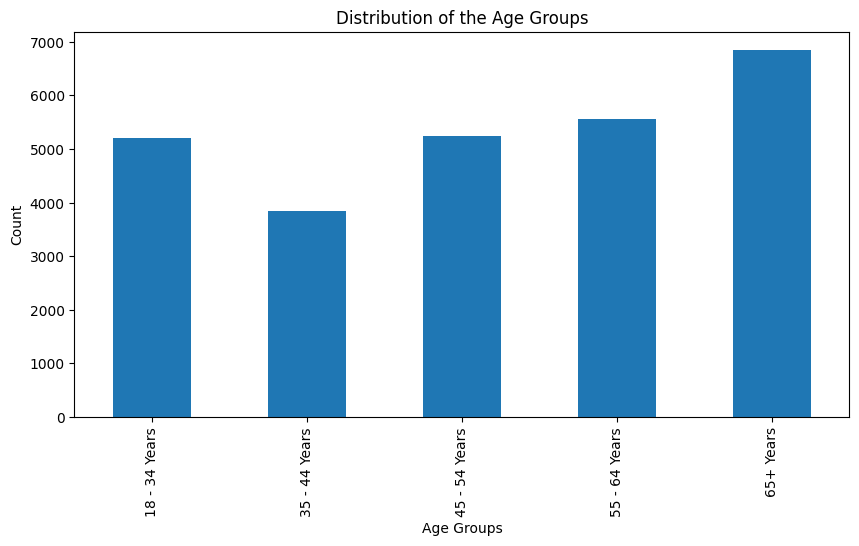

In [17]:
# Distribution of the age groups.
plt.figure(figsize=[10, 5])
df_train_data['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of the Age Groups")
plt.xlabel("Age Groups")
plt.ylabel('Count')
plt.show()

Highest respondents are older than 65 years.

In [18]:
def clean_age_group(df):
    """
    # Function to clean age group column.
    # df : DataFrame.
    """
    df['age_group'] = df['age_group'].map({
    '18 - 34 Years' : '1', 
    '35 - 44 Years' : '2', 
    '45 - 54 Years' : '3', 
    '55 - 64 Years' : '4', 
    '65+ Years' : '5'
    })

# Cleaning age_group column in the train dataset.
clean_age_group(df_train_data)
df_train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,1,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,5,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,3,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [19]:
# Cleaning age_group column in the test dataset.
clean_age_group(df_test_set_features)

In [20]:
# Looking for unique values in education column.
df_train_data['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

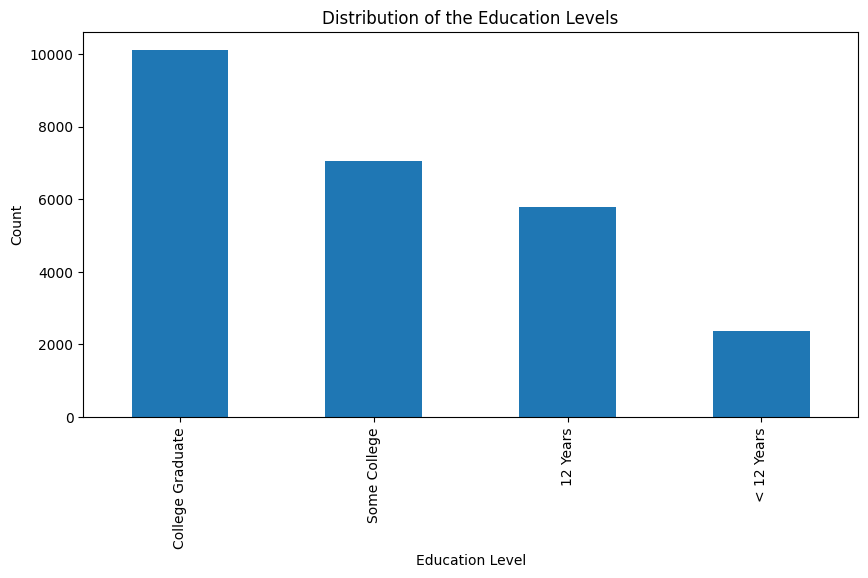

In [21]:
# Distribution of the education levels.
plt.figure(figsize=[10,5])
df_train_data['education'].value_counts().plot(kind='bar')
plt.title('Distribution of the Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

Highest respondents are college graduates.

In [22]:
def clean_education_column(df):
    """
    # Function to Clean education column.
    # Mapping values for education order.
    # df : DataFrame.
    """
    df['education'] = df['education'].map({
        '< 12 Years' : '1', 
        '12 Years' : '2', 
        'Some College' : '3', 
        'College Graduate' : '4'
    })

# Cleaning education column in the train data set.
clean_education_column(df_train_data)


In [23]:
df_train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4,1,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2,2,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,1,4,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,5,2,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,3,3,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [24]:
# Cleaning education column in the test data set.
clean_education_column(df_test_set_features)

In [25]:
df_test_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,2,4,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,1,2,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,4,4,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,5,2,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,2,2,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [26]:
# Looking for unique values in income_poverty column.
df_train_data['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

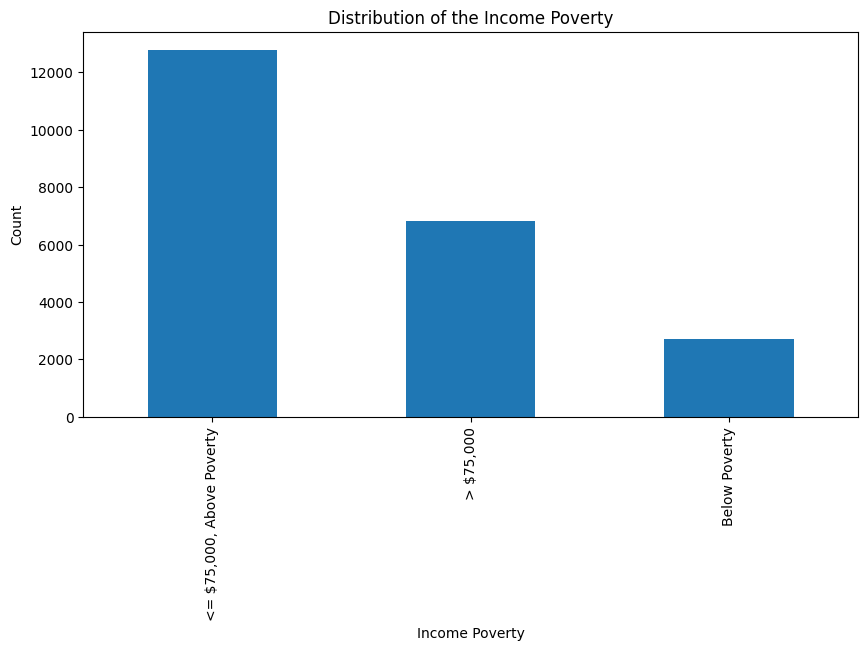

In [27]:
# Distribution of the income poverty.
plt.figure(figsize=[10,5])
df_train_data['income_poverty'].value_counts().plot(kind='bar')
plt.title('Distribution of the Income Poverty')
plt.xlabel('Income Poverty')
plt.ylabel('Count')
plt.show()


Highest respondents are above poverty (<=$75000)

In [28]:
def clean_income_poverty_column(df):
    """
    # Function to clean income_poverty column.
    # Mapping values for income_poverty order.
    """
    df['income_poverty'] = df['income_poverty'].map({
        'Below Poverty' : '1', 
        '<= $75,000, Above Poverty' : '2', 
        '> $75,000' : '3'
    })

# Cleaning income_poverty column in the train dataset.
clean_income_poverty_column(df_train_data)

In [29]:
# Cleaning income_poverty column in the test dataset.
clean_income_poverty_column(df_test_set_features)

In [30]:
df_test_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,2,4,Hispanic,Female,3,Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,1,2,White,Male,1,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,4,4,White,Male,3,Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,5,2,White,Female,2,Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,2,2,Black,Female,2,Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


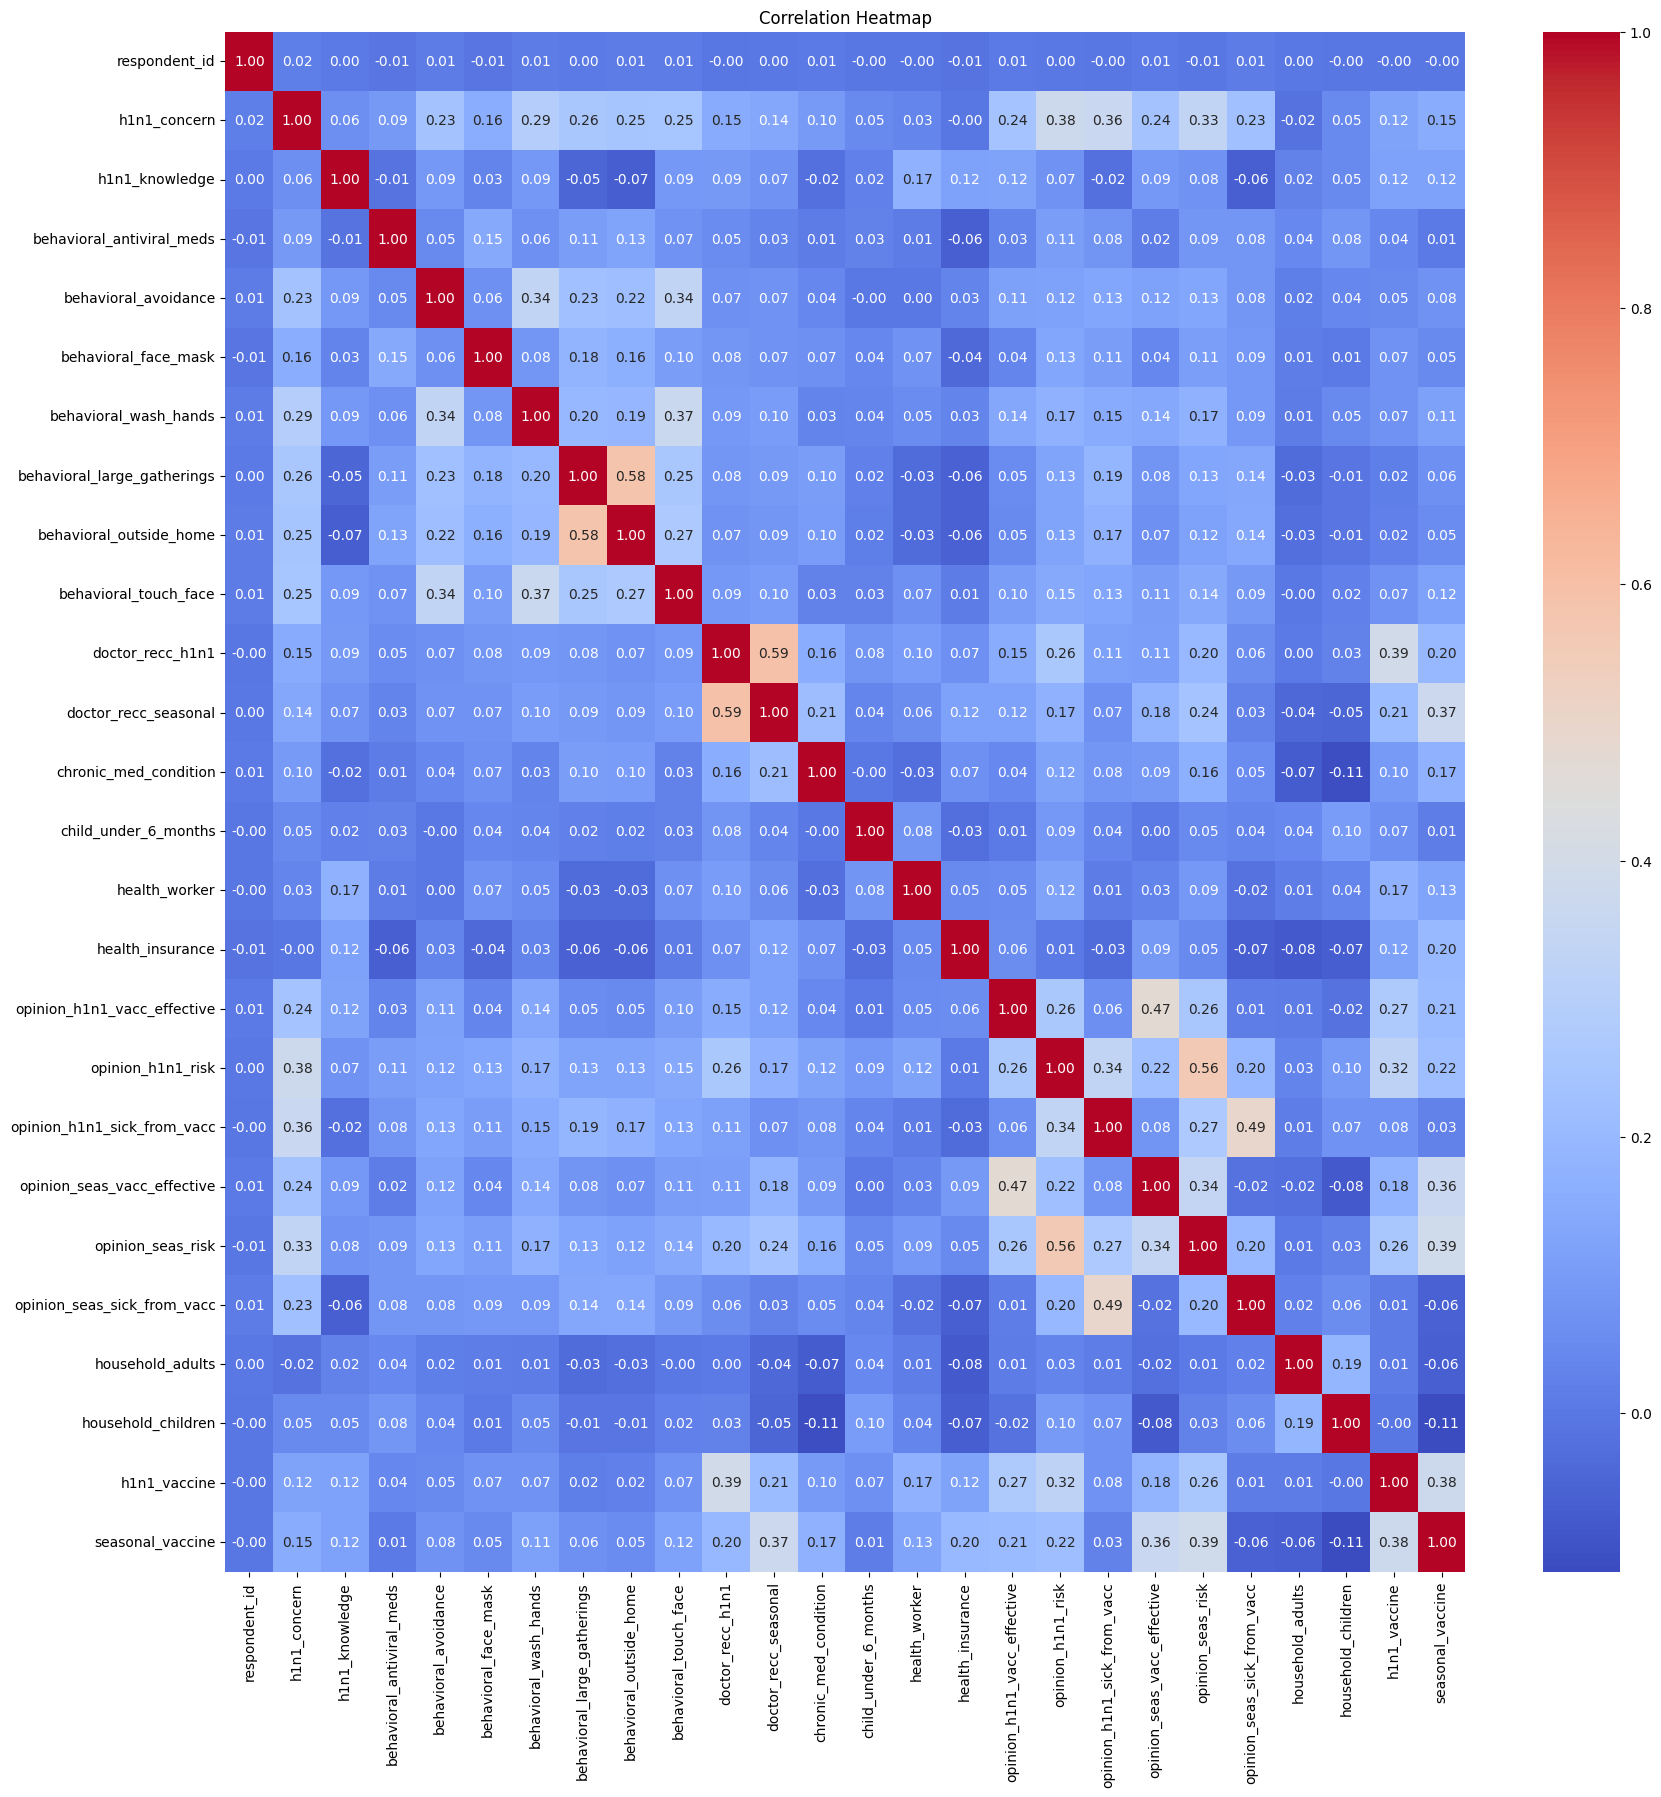

In [31]:
# Heatmap for numerical columns.
plt.figure(figsize=(20,20))
# Correlation matrix as a heatmap.
sns.heatmap(df_train_data \
            .corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation Heatmap')
plt.show()

Observations:
1. There is a relationship between 'behavioral_large_gatherings' and 'behavioral_outside_home'.
2. There is a relationship between 'doctor_recc_h1n1' and 'doctor_recc_seasonal'.
3. There is a relationship between 'opinion_h1n1_risk' and 'opinion_seas_risk'.

In [32]:
# Identifying unique values in the health insurance.
df_train_data['health_insurance'].unique()

array([ 1., nan,  0.])

Exploring distribution of health insurance with respect to h1n1 vaccine and seasonal vaccine before imputing or droping, because health insurance column has over 45% missing values.

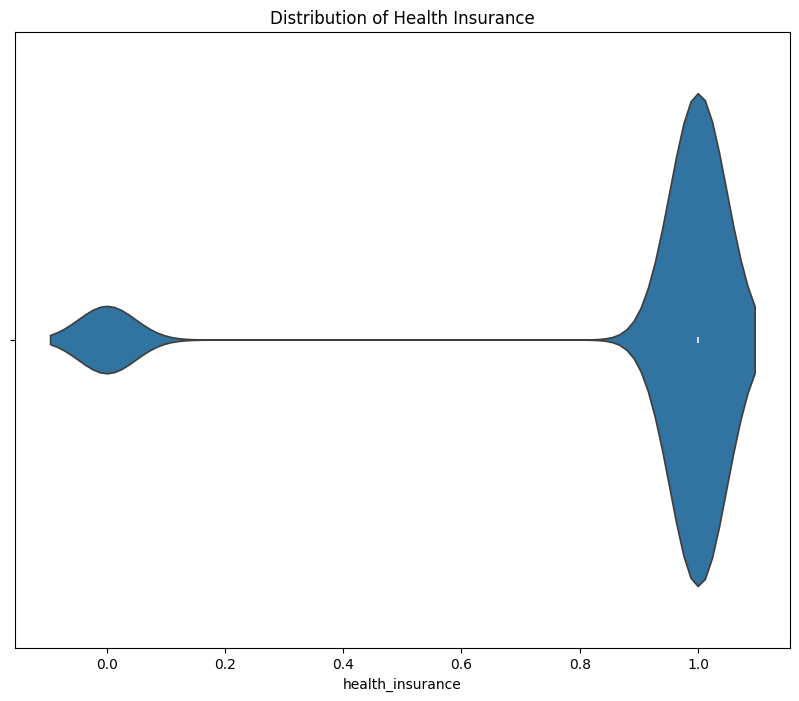

In [33]:
# Visualizing distribution of health_insurance column using violin plot.
plt.figure(figsize=(10,8))
sns.violinplot(data=df_train_data, x='health_insurance')
plt.title("Distribution of Health Insurance")
plt.show()

According to the distribution, most of the respondents have health insurance.

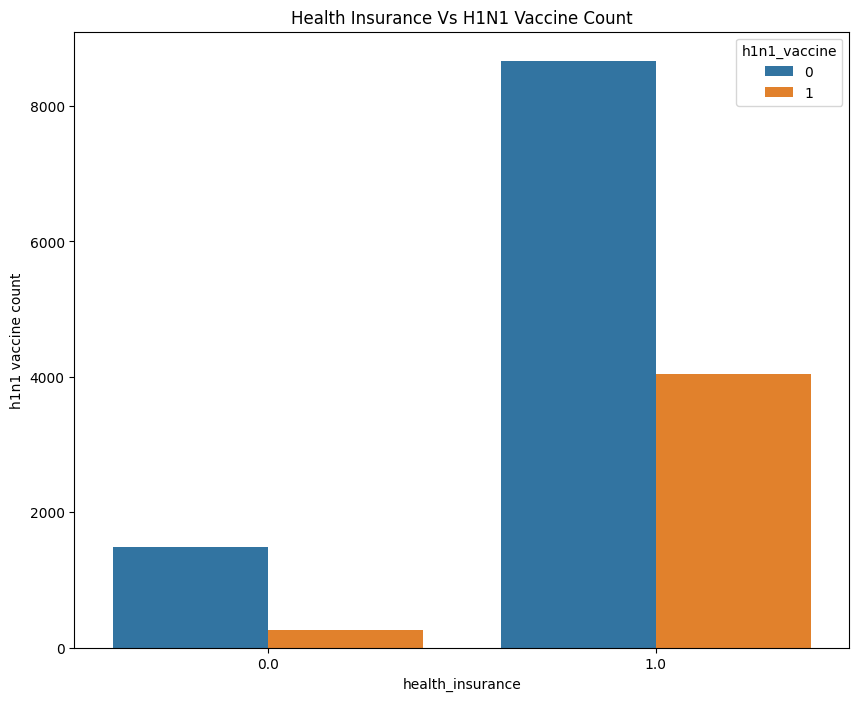

In [34]:
# Exploring health insurance with respect to the h1n1 vaccine.
# Applying groupby to identify relashioship between health insurance and 
# h1n1 vacccine.
insurance_h1n1 = df_train_data.groupby([
    'health_insurance', 
    'h1n1_vaccine'
]).size().reset_index().rename(columns={0 : 'h1n1 vaccine count'})

# Visualizing Health Insurance Vs H1N1 count.
plt.figure(figsize=(10,8))
sns.barplot(
    x='health_insurance', 
    y='h1n1 vaccine count', 
    hue='h1n1_vaccine', 
    data=insurance_h1n1
)
plt.title("Health Insurance Vs H1N1 Vaccine Count")
plt.show()

1. There is a dramatic increase both of the h1n1 not recived and recieved count when person hold a health insurance.
2. Around 9000 health insurance holders have not been recieved H1N1 vaccine.
3. 4000 health insurance holders recieve H1N1 vaccine.

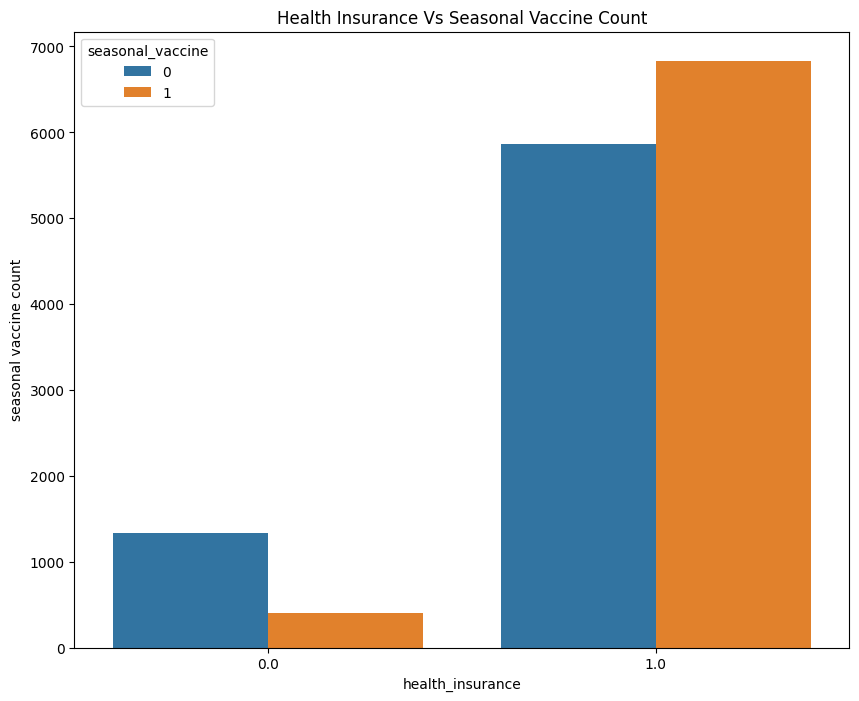

In [35]:
# Exploring health insurance with respect to the seasonal vaccine.
# Applying groupby to identify relashioship between health insurance and 
# seasonal vacccine.
insurance_seasonal = df_train_data.groupby([
    'health_insurance', 
    'seasonal_vaccine'
]).size().reset_index().rename(columns={0 : 'seasonal vaccine count'})

# Visualizing Health Insurance Vs Seasonal Vaccine Count.
plt.figure(figsize=(10,8))
sns.barplot(
    x='health_insurance', 
    y='seasonal vaccine count', 
    hue='seasonal_vaccine', 
    data=insurance_seasonal
)
plt.title("Health Insurance Vs Seasonal Vaccine Count")
plt.show()

1. Approximately 7000 insurance holders have been recieved seasonal vaccine.
2. 500 persons' have been recieved the seasonal vaccine without any health insurance.

In overall, h1n1_vaccine and seasonal_vaccine have relashionship with Health_insurance. So, I am not droping Health_insurance column. In order to the barplots and violin plot, missing values are imputed with median of the Health_insurance column.

Exploring distribution of employment_industry column with respect to h1n1 vaccine and seasonal vaccine before imputing or droping, because health insurance column has over almost 50% missing values.

In [36]:
# Looking for unique values in the employment_industry column.
df_train_data['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

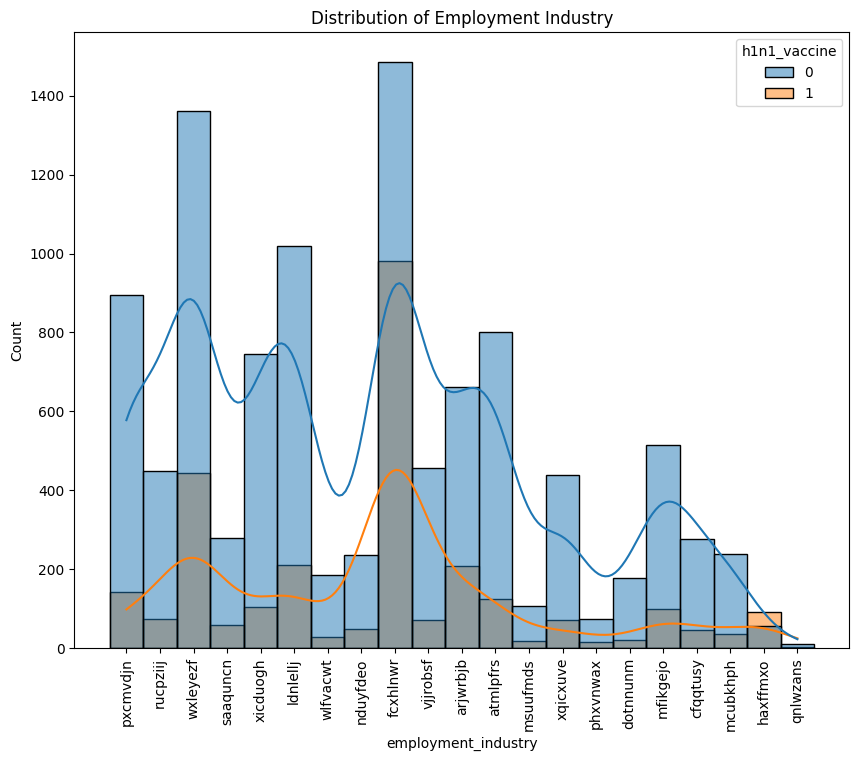

In [37]:
# Visualizing distribution of employment_industry with h1n1_vaccine.
plt.figure(figsize=(10,8))
sns.histplot(
    x='employment_industry', 
    data=df_train_data, 
    hue='h1n1_vaccine', 
    kde=True
)
plt.title("Distribution of Employment Industry")
plt.xticks(rotation=90)
plt.show()

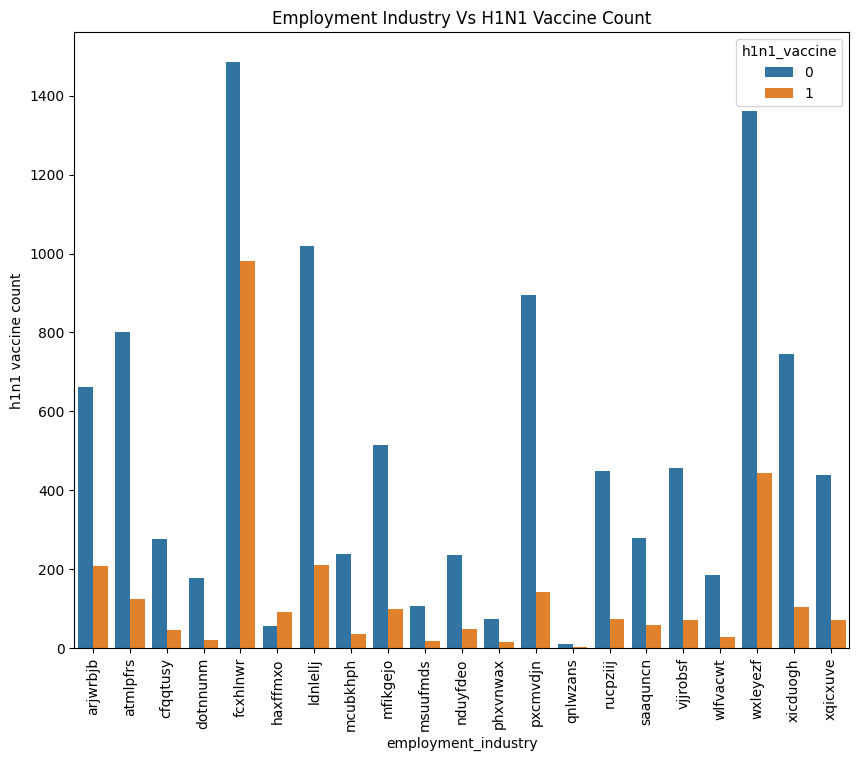

In [38]:
# Exploring employment_industry with respect to the h1n1 vaccine.
# Applying groupby to identify relashioship between employment_industry 
# and h1n1 vacccine.
insurance_h1n1 = df_train_data.groupby([
    'employment_industry', 
    'h1n1_vaccine'
]).size().reset_index().rename(columns={0 : 'h1n1 vaccine count'})

# Visualizing eEmployment Industry Vs H1N1 Count.
plt.figure(figsize=(10,8))
sns.barplot(
    x='employment_industry', 
    y='h1n1 vaccine count', 
    hue='h1n1_vaccine', 
    data=insurance_h1n1
)
plt.title("Employment Industry Vs H1N1 Vaccine Count")
plt.xticks(rotation=90)
plt.show()

Highest number of persons' have recieved h1n1_vaccine(1000) and not recived h1n1_vaccine(1500) in 'fcxhlnwr' industry.

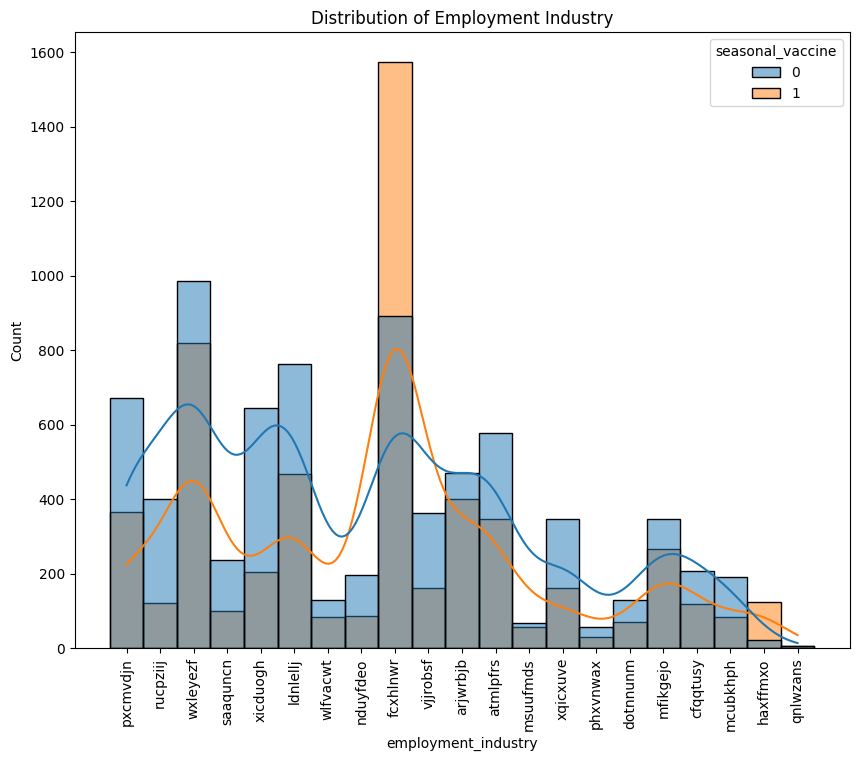

In [39]:
# Visualizing distribution of employment_industry with seasonal_vaccine.
plt.figure(figsize=(10,8))
sns.histplot(
    x='employment_industry', 
    data=df_train_data, 
    hue='seasonal_vaccine',
    kde=True
)
plt.title("Distribution of Employment Industry")
plt.xticks(rotation=90)
plt.show()

In [40]:
# Exploring employment_industry with respect to the seasonal_vaccine.
# Applying groupby to identify relashioship between employment_industry 
# and seasonal_vacccine.
df_train_data.groupby([
    'employment_industry', 
    'seasonal_vaccine'
]).size().unstack().style.background_gradient(axis=1)

seasonal_vaccine,0,1
employment_industry,,
arjwrbjb,470,401
atmlpfrs,579,347
cfqqtusy,207,118
dotnnunm,130,71
fcxhlnwr,893,1575
haxffmxo,23,125
ldnlellj,762,469
mcubkhph,192,83
mfikgejo,346,268


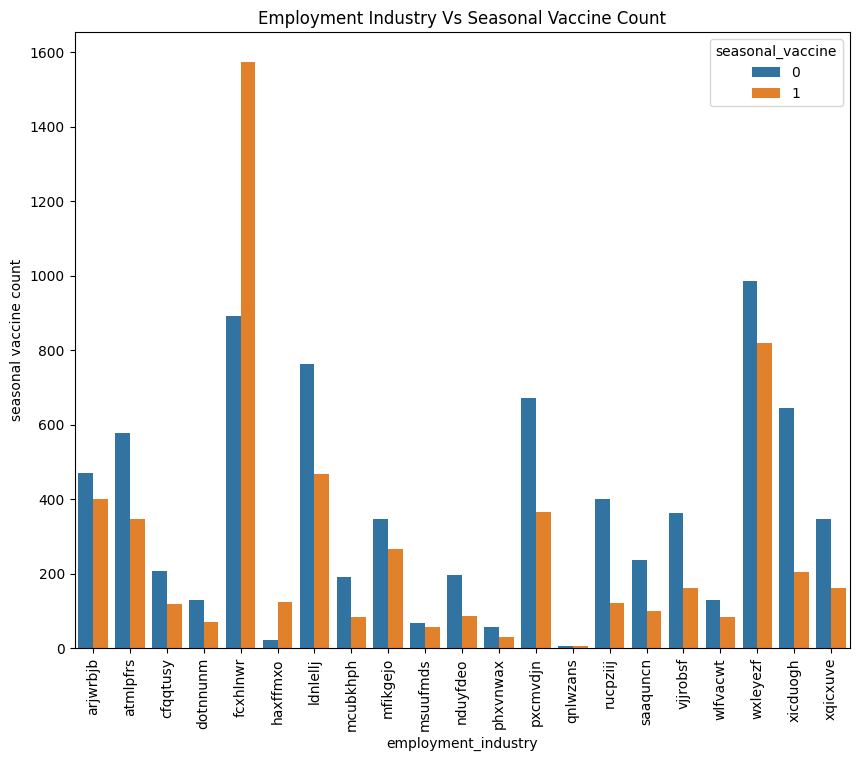

In [41]:
# Visualizing employment_industry Vs seasonal_vaccine Count.
plt.figure(figsize=(10,8))
sns.barplot(
    x='employment_industry', 
    y='seasonal vaccine count', 
    hue='seasonal_vaccine', 
    data=df_train_data.groupby([
    'employment_industry', 
    'seasonal_vaccine'
]).size().reset_index().rename(columns={0 : 'seasonal vaccine count'})
)
plt.title("Employment Industry Vs Seasonal Vaccine Count")
plt.xticks(rotation=90)
plt.show()

Highest number of persons' have recieved seasonal_vaccine(1600) in 'fcxhlnwr' industry.

In order to the histplots and bar plots, there are no specific relashioship between target variabels and employment industry. And also the employment industry column has almost 50% missing values. So I am droping employment_industry column. 

In [42]:
# Looking for unique values in the employment_industry column.
df_train_data['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

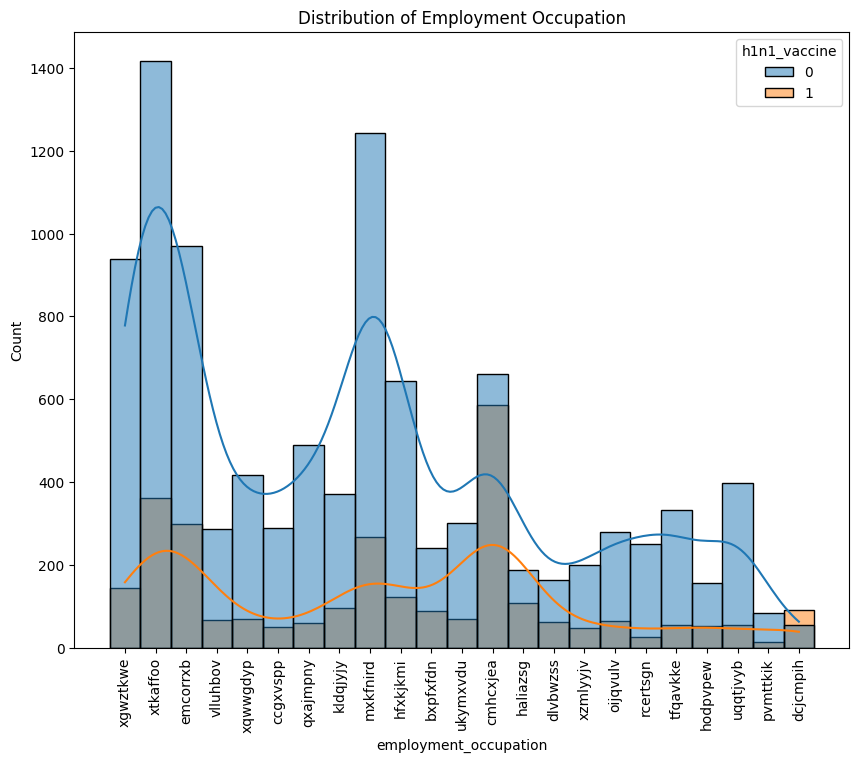

In [43]:
# Visualizing distribution of employment_occupation with h1n1_vaccine.
plt.figure(figsize=(10,8))
sns.histplot(
    x='employment_occupation', 
    data=df_train_data, 
    hue='h1n1_vaccine', 
    kde=True
)
plt.title("Distribution of Employment Occupation")
plt.xticks(rotation=90)
plt.show()

1. Highest number of persons' have recieved h1n1_vaccine(600) in 'cmhcxjea' occupation.
2. Highest number of persons' have not recieved h1n1_vaccine(1400) in 'xtkaffoo' occupation.

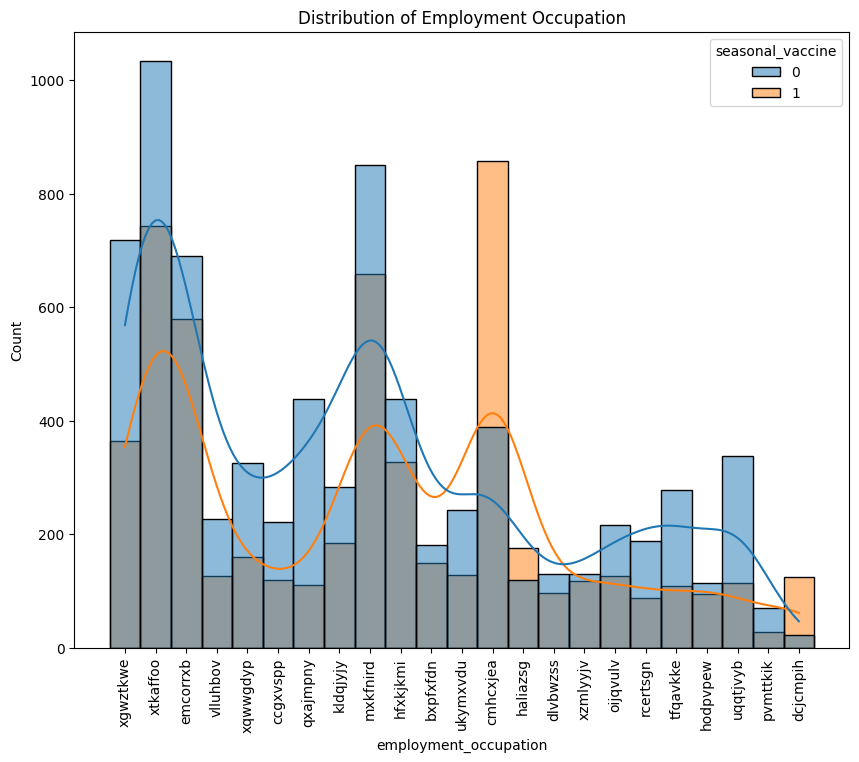

In [44]:
# Visualizing distribution of employment_occupation with seasonal_vaccine.
plt.figure(figsize=(10,8))
sns.histplot(
    x='employment_occupation', 
    data=df_train_data, 
    hue='seasonal_vaccine', 
    kde=True
)
plt.title("Distribution of Employment Occupation")
plt.xticks(rotation=90)
plt.show()

1. Highest number of persons' have recieved seasonal_vaccine(850) in 'cmhcxjea' occupation.
2. Highest number of persons' have not recieved h1n1_vaccine(1050) in 'xtkaffoo' occupation.

In order to the histplots, there are no specific relashioship between target variabels and employment occupation. And also the employment occupation column has over 50% missing values. So I am droping employment_occupation column. 

In [45]:
# Columns to drop which are not needed for further analysis.
columns_to_drop = ['respondent_id', 'employment_industry', 'employment_occupation']

In [46]:
def drop_columns(df, columns_to_drop):
    """
    # Function to drop columns which are not needed for further analysis.
    # df : DataFrame.
    # columns_to_drop : columns which is needed to drop.
    """
    df = df.drop(columns_to_drop, axis=1, inplace=True)

drop_columns(df_train_data, columns_to_drop)

In [47]:
df_train_data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4,1,White,Female,1,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2,2,White,Male,1,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,1,4,White,Male,2,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,5,2,White,Female,1,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,3,3,White,Female,2,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [48]:
# Dropping columns which are not needed for further analysis in the test
# dataset.
drop_columns(df_test_set_features, columns_to_drop)

In [49]:
df_test_set_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,2,4,Hispanic,Female,3,Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,1,2,White,Male,1,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,4,4,White,Male,3,Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,5,2,White,Female,2,Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,2,2,Black,Female,2,Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0


In [50]:
# Checking out columns.
df_train_data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [51]:
# Comparing h1n1 vaccine and seasonal vaccine with respect to the sex.
df_train_data.groupby([
    'sex', 
    'h1n1_vaccine'
]).size().unstack().style.background_gradient(axis=1)

h1n1_vaccine,0,1
sex,,
Female,12378,3480
Male,8655,2194


In [52]:
# Comparing h1n1 vaccine and seasonal vaccine with respect to the sex.
df_train_data.groupby([
    'sex', 
    'seasonal_vaccine'
]).size().unstack() \
    .style.background_gradient(axis=1)

seasonal_vaccine,0,1
sex,,
Female,7970,7888
Male,6302,4547


Most of the male and female respondents tend to recieve seasonal vaccine than h1n1.

In [53]:
# Exploring knowledge on h1n1 with respect to education level.
df_train_data.groupby(['education',
    'h1n1_knowledge' 
]).size().unstack().style.background_gradient(axis=1)

h1n1_knowledge,0.000000,1.000000,2.000000
education,,,
1,692,1318,327
2,777,3625,1368
3,452,4122,2445
4,257,4822,4990


Most of the College Graduates have good knowledge about h1n1 compairing to others.

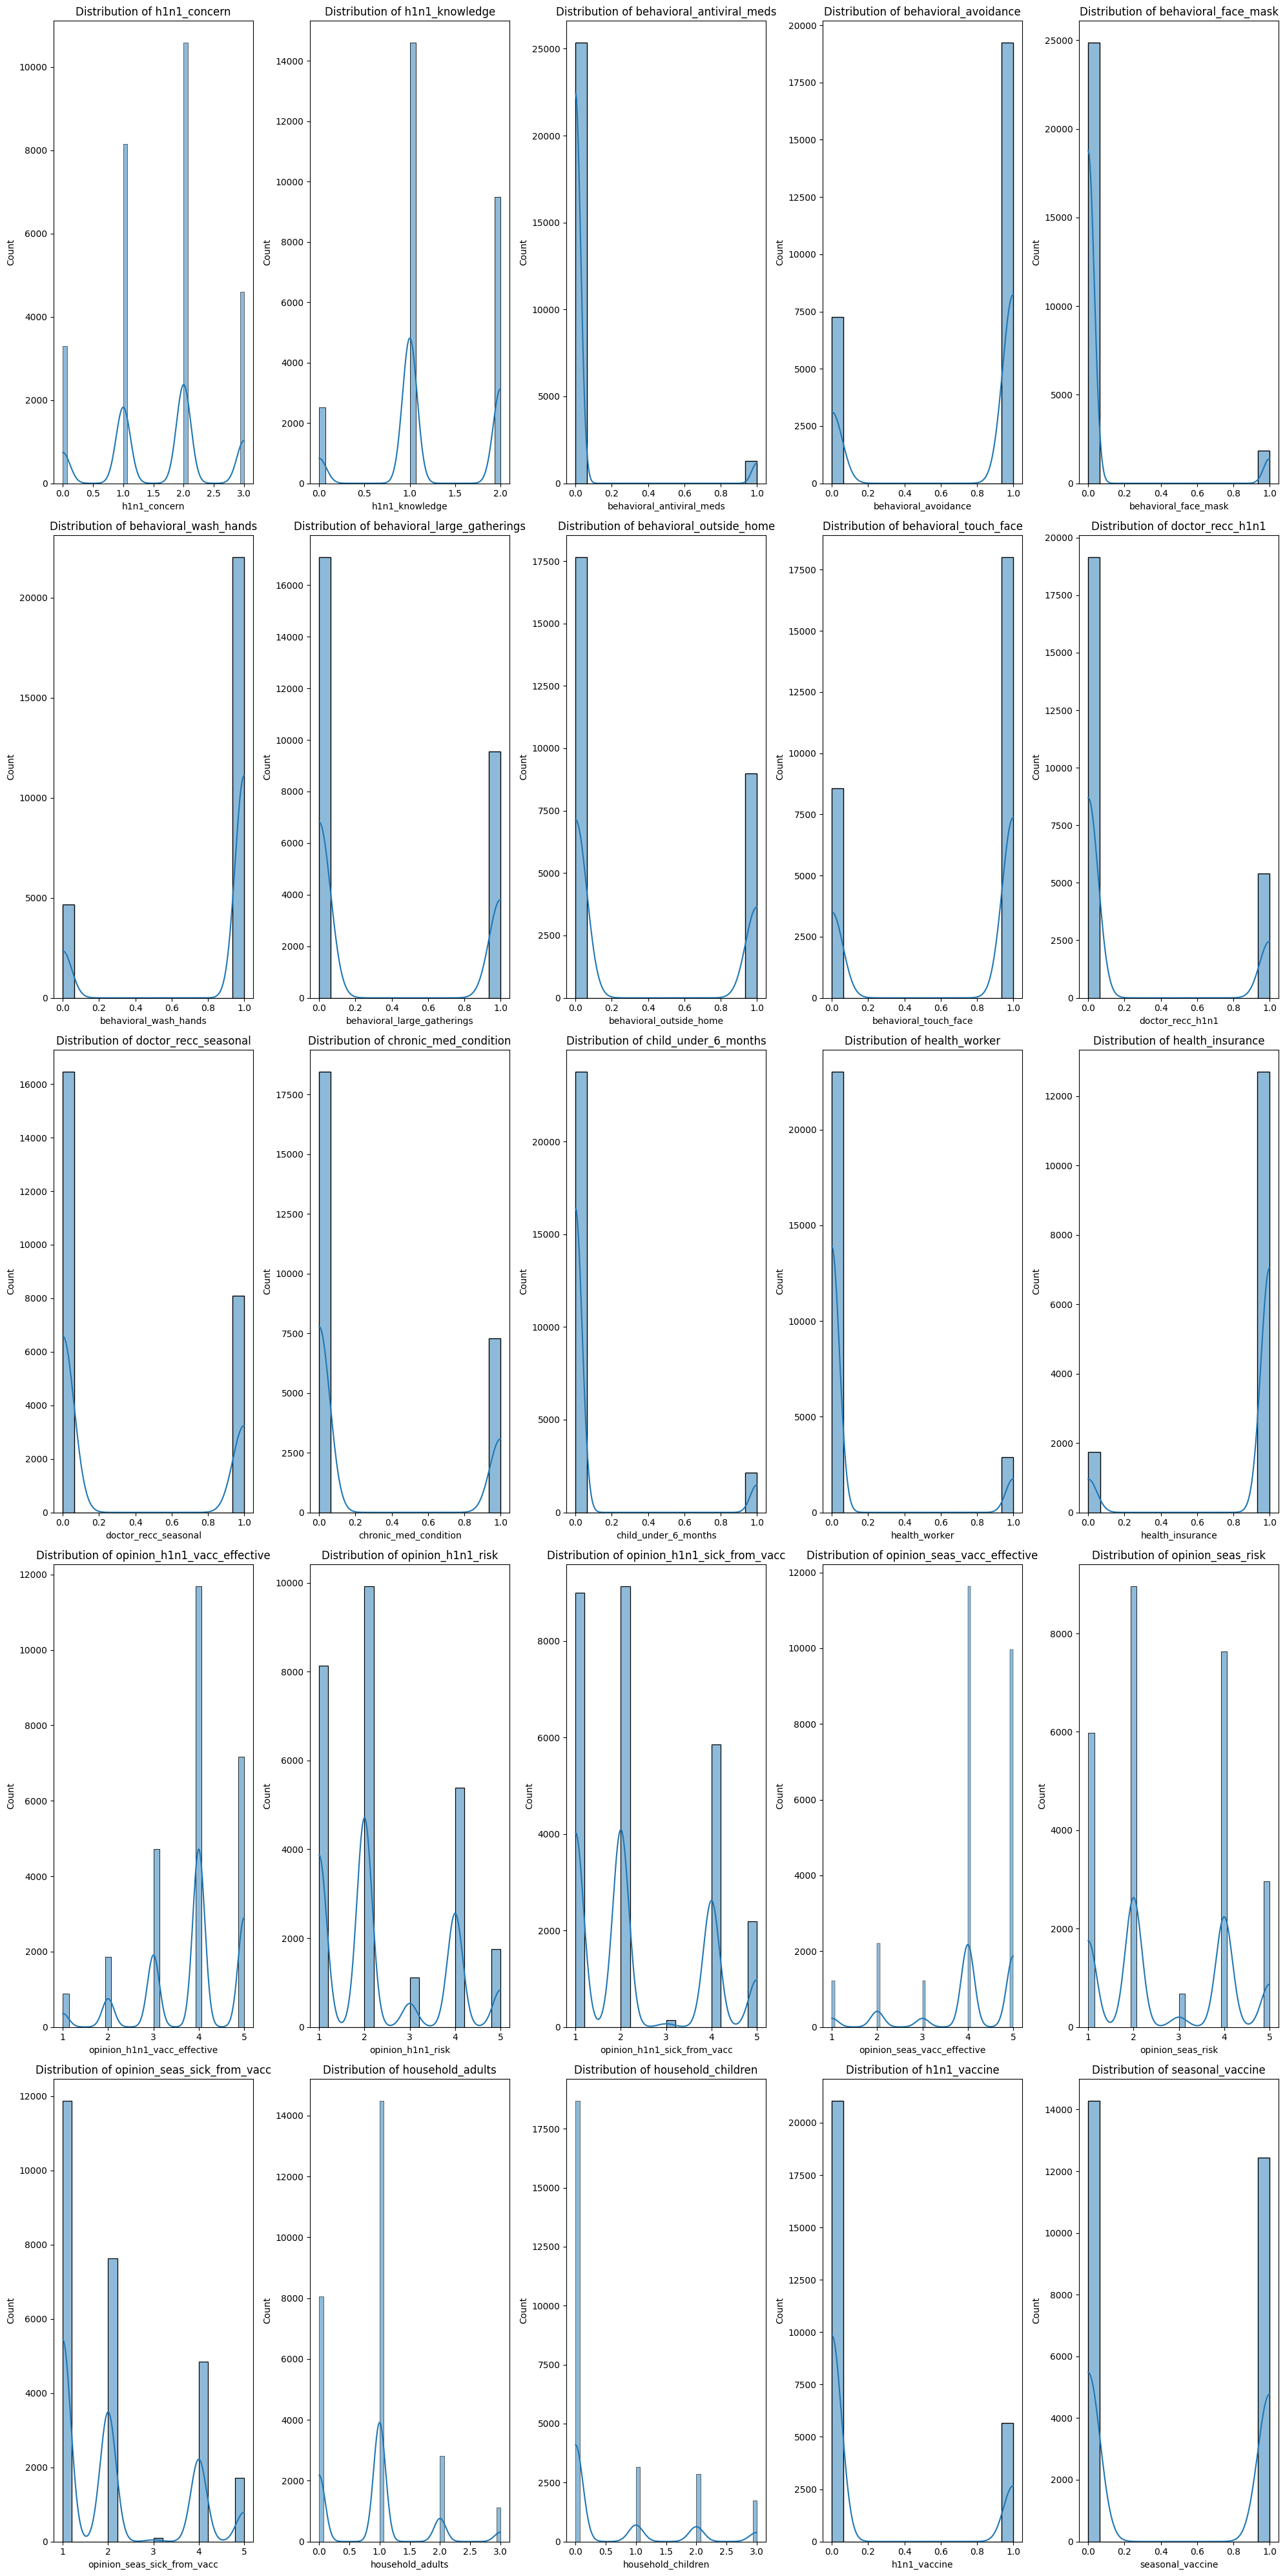

In [54]:
# Visualizing Distributions numerical columns.
def plot_distributions(df, numeric_columns, nrows=5, ncols=5):
    """
    # Function for visualizing distribution of the numerical columns 
    # data.
    # df : DataFrame.
    # numeric_columns : Numerical columns of the main dataframe.
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 40))
    axes = axes.flatten()
    for i, col in enumerate(numeric_columns):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Selecting numerical columns.
numeric_columns = df_train_data.select_dtypes(include=[np.number]).columns

plot_distributions(df_train_data, numeric_columns)

1. Although most people (around 17,000) have knowledge about H1N1, approximately 50% of the population remains concerned about it.
2. Although approximately 14,000 people think the H1N1 vaccine is effective, about 17,000 believe the seasonal vaccine is effective.
3. The highest  number(Approximately 11000) of respondents have Somewhat concerned about the H1N1 flu.

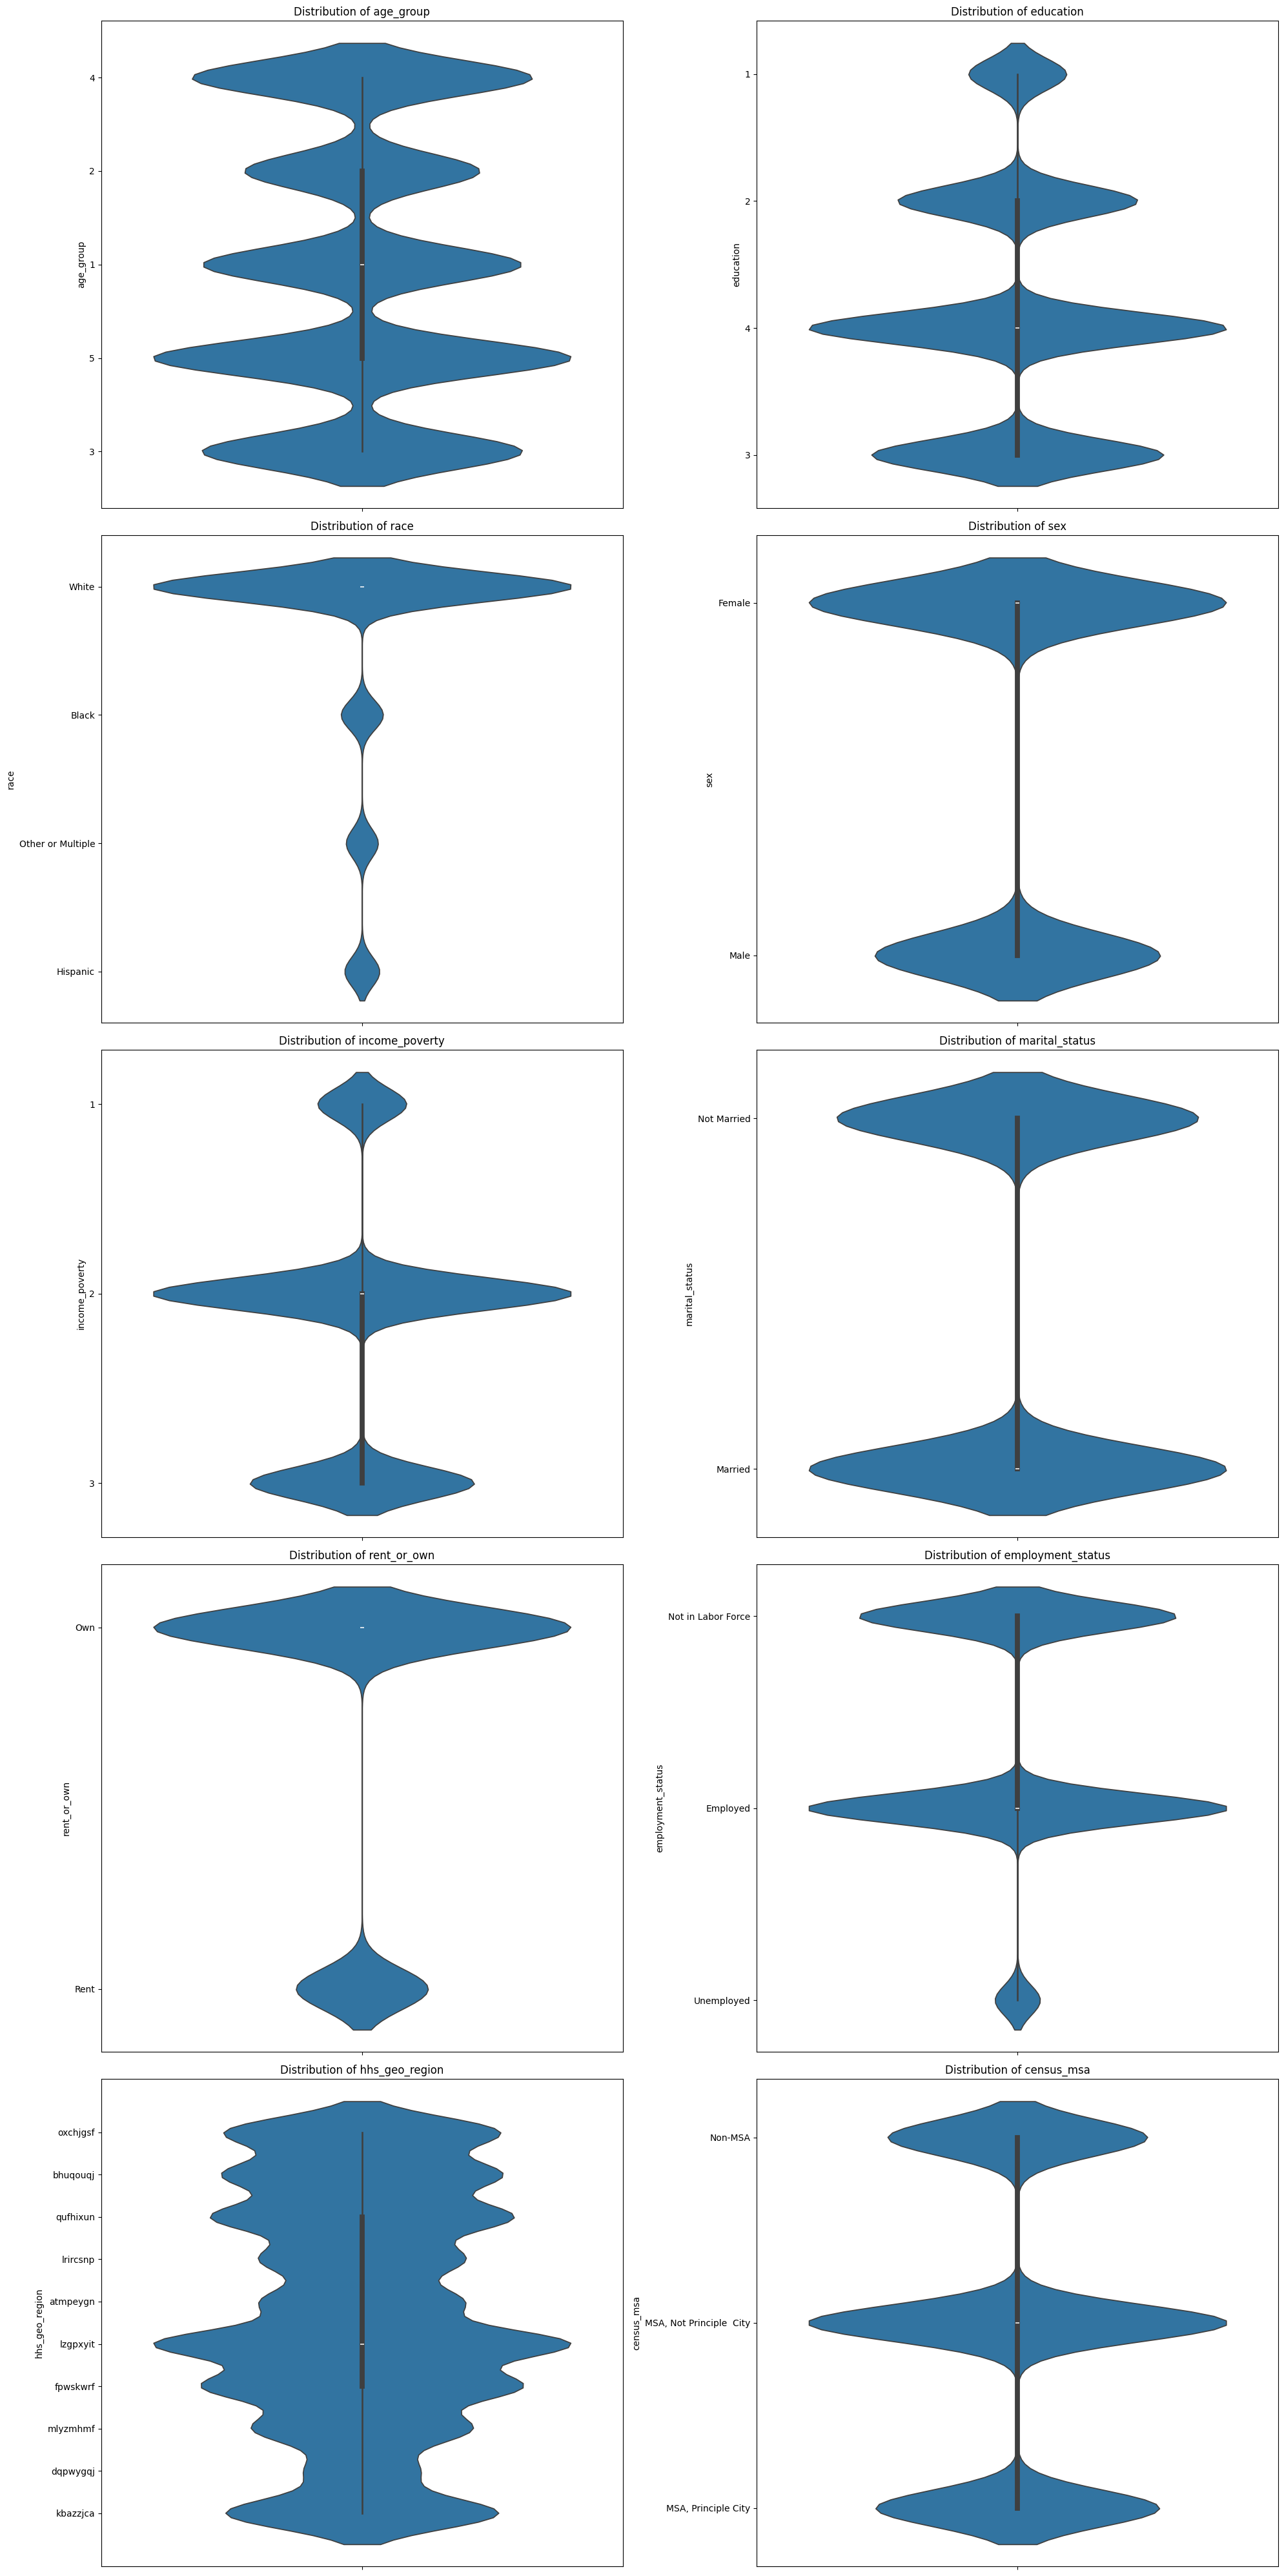

In [55]:
# Visualizing Distributions of categorical columns.
def plot_distributions(df, categorical_columns, nrows=5, ncols=2):
    """
    # Function for visualizing distribution of the categorical columns 
    # data.
    # df : DataFrame.
    # categorical_columns : Categorical columns of the main dataframe.
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 40))
    axes = axes.flatten()
    for i, col in enumerate(categorical_columns):
        sns.violinplot(df[col], ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Selecting categorical columns.
categorical_columns = df_train_data.select_dtypes(include='object').columns

plot_distributions(df_train_data, categorical_columns)

In [56]:
def handle_missing_values(df):
    """
    # Function for handling missing values in categorical columns and
    # numerical columns.
    # df : DataFrame.
    """
    # Identifiyng categorical columns.
    cat_columns = df.select_dtypes(include='object').columns

    # Identifying numerical columns.
    num_columns = df.select_dtypes(include=[np.number]).columns

    # Imputing missing values with mode for categorical columns.
    for col in cat_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Imputing missing values with median for numerical columns.
    for colu in num_columns:
        df[colu].fillna(df[colu].median(), inplace=True)

# Handling missing values in the train dataset.
handle_missing_values(df=df_train_data)

In [57]:
# Handling missing values in the test data set.
handle_missing_values(df=df_test_set_features)

All the missing values in the categorical columns and numerical columns are handled with mode and median of the column.

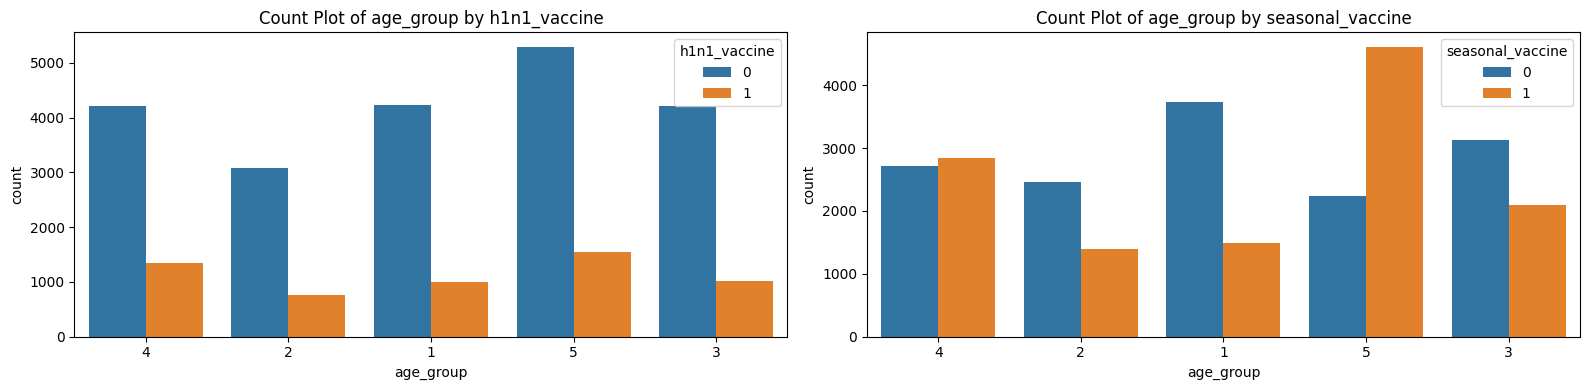

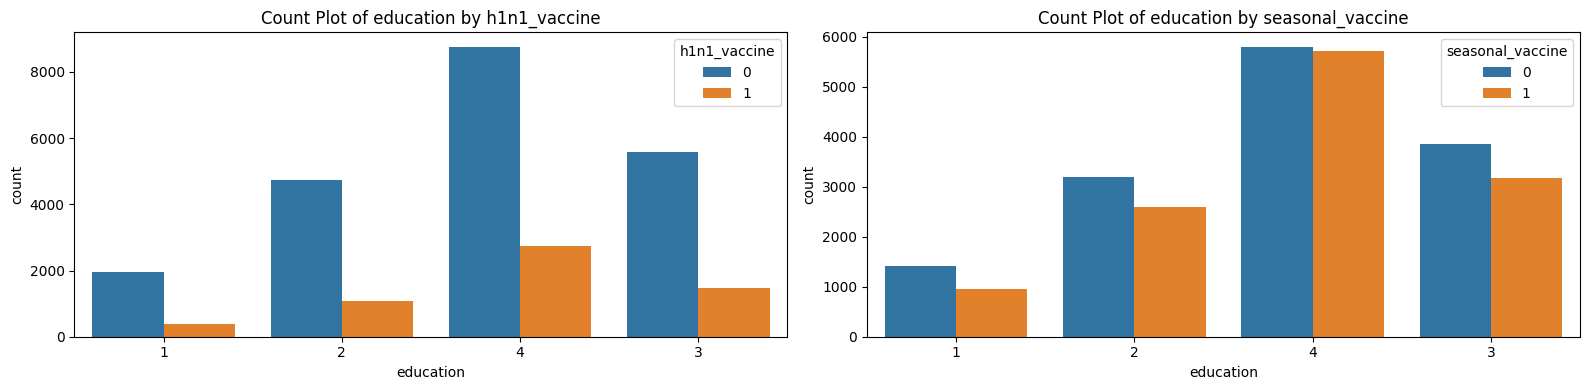

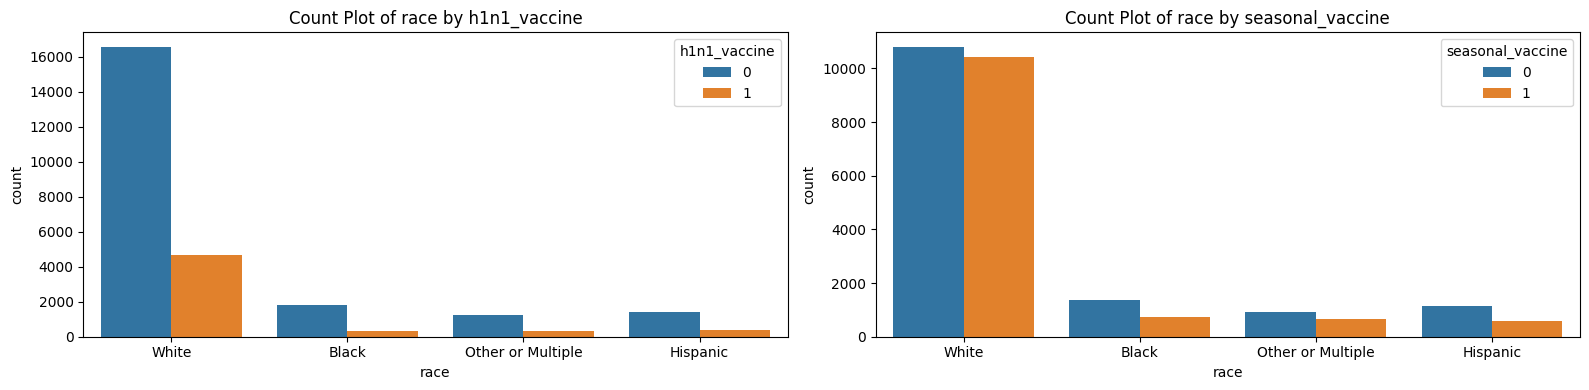

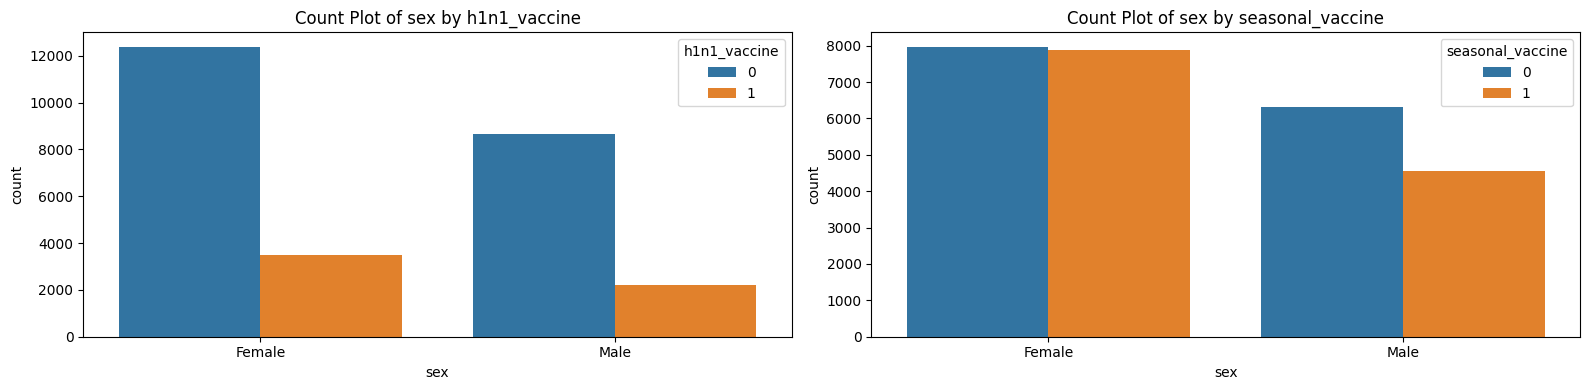

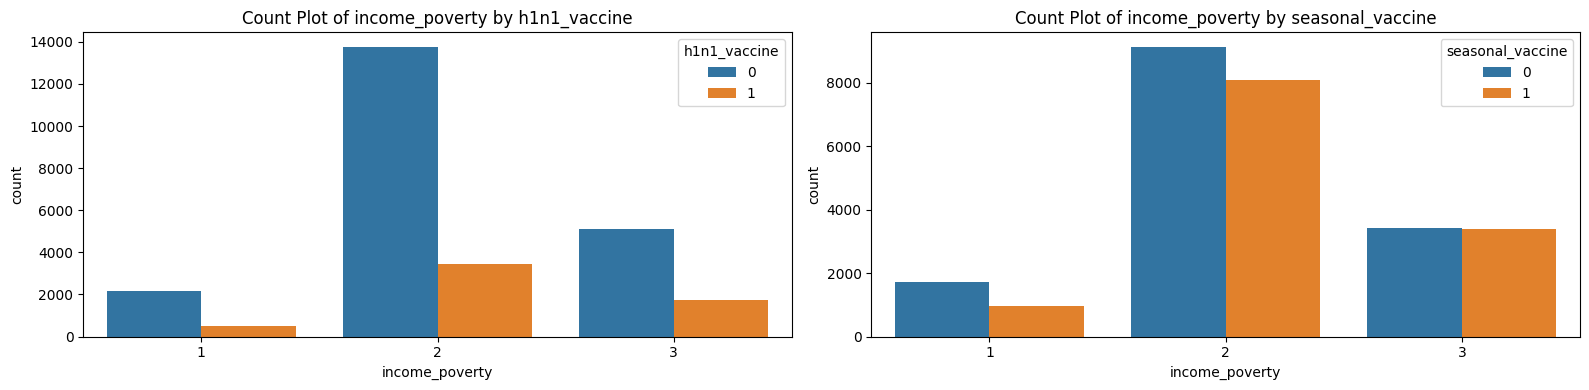

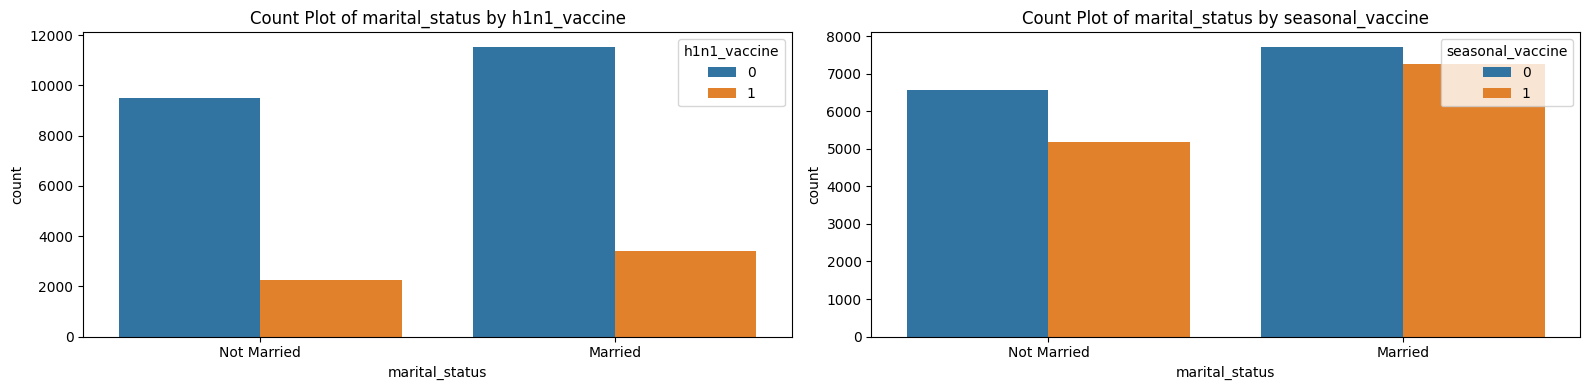

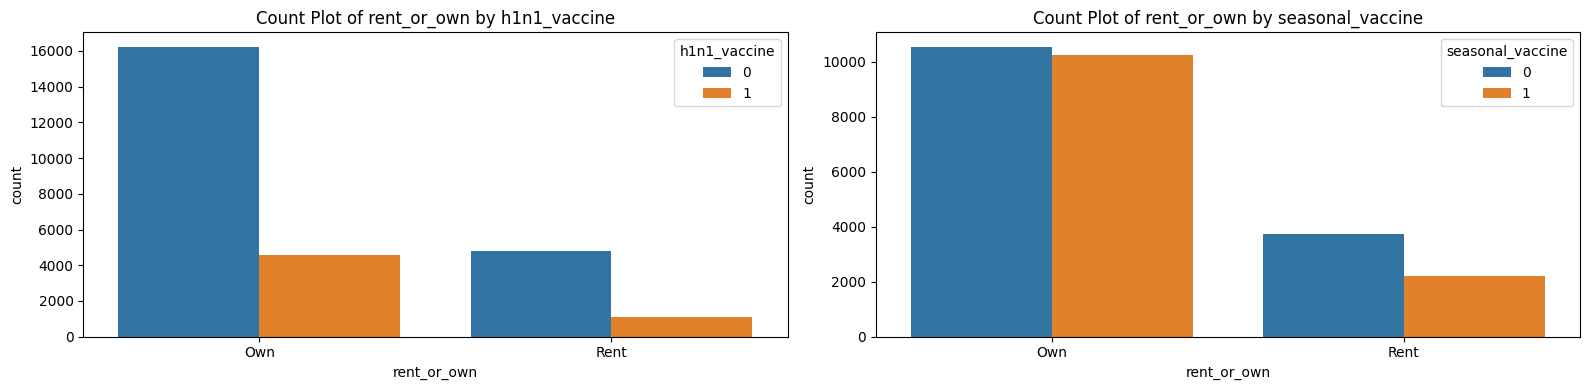

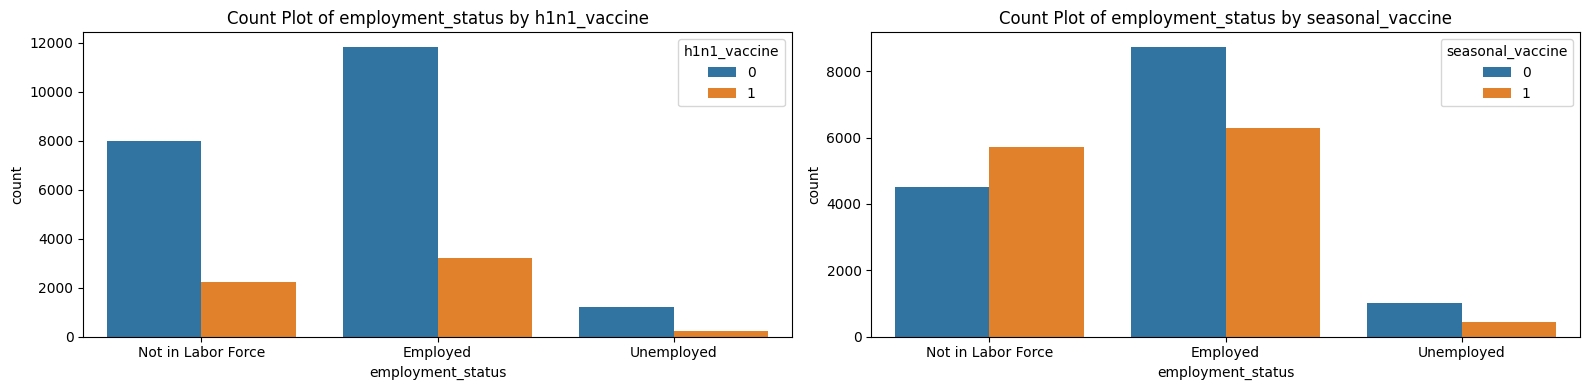

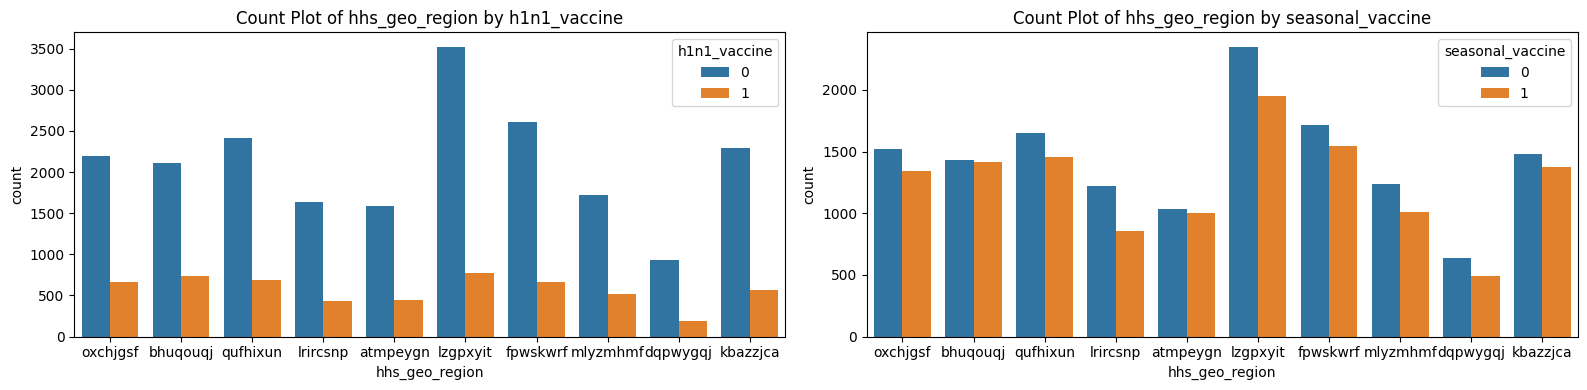

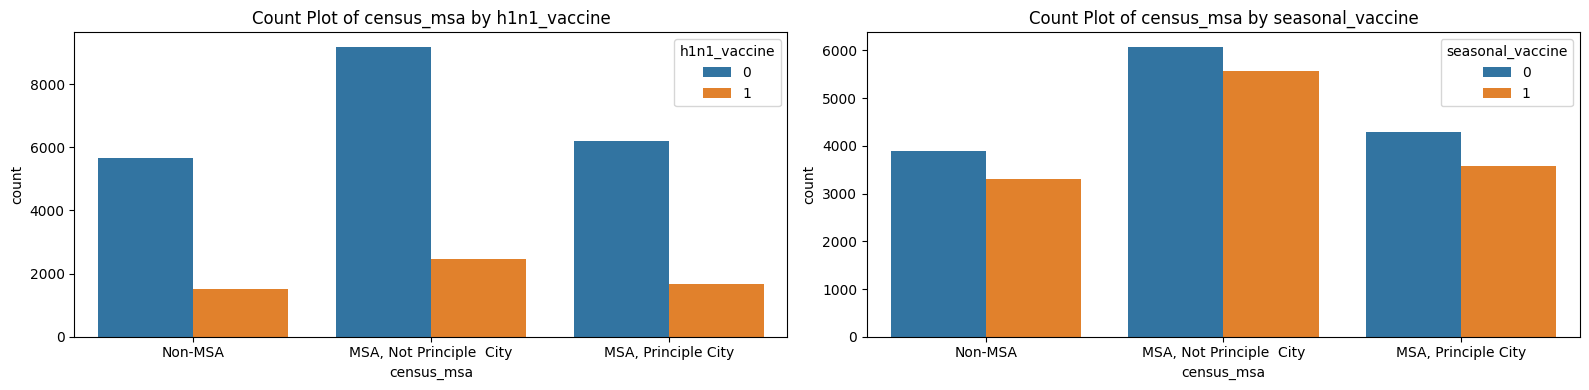

In [58]:
# Visualizing Categorical Variables.
def plot_categorical_columns(df, cols, target_vars):
    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(16, 4)) 
        axes = axes.flatten()
        for i, target in enumerate(target_vars):
            sns.countplot(x=col, hue=target, data=df, ax=axes[i])
            axes[i].set_title(f'Count Plot of {col} by {target}')
        plt.tight_layout()
        plt.show()

categoric_columns = df_train_data.select_dtypes(include=['object']).columns
target_vars = df_train_data.columns[-2:]
plot_categorical_columns(df_train_data, categoric_columns, target_vars)

1. Most people have not received either the H1N1 or the seasonal vaccine.
2. Most people have received the seasonal vaccine rather than the H1N1 vaccine.

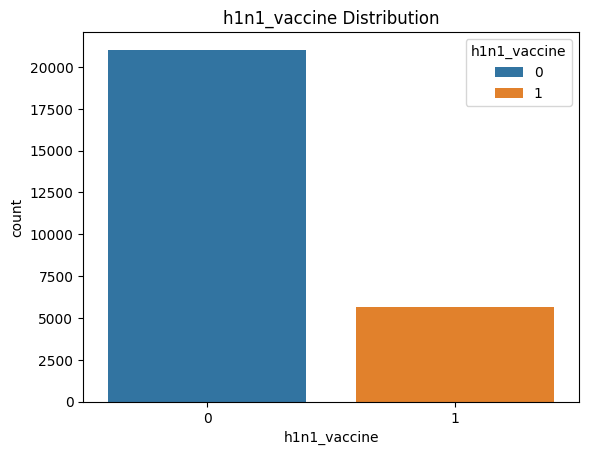

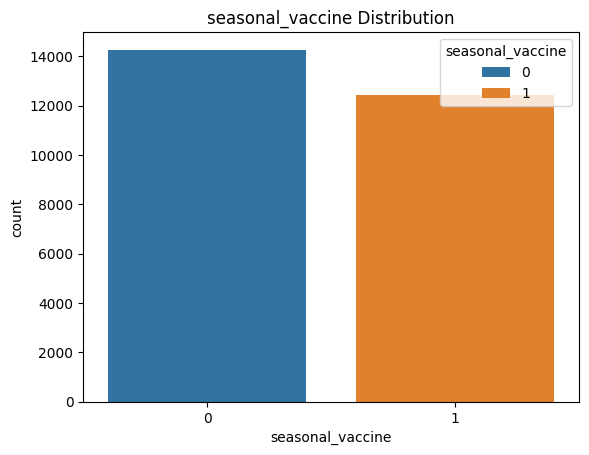

In [59]:
# Visualizing Target Variables.
target_vars = df_train_data.columns[-2:]
for target in target_vars:
    sns.countplot(x=target, data=df_train_data, hue=target)
    plt.title(f'{target} Distribution')
    plt.show()

- Most people (around 16,000) have not received the H1N1 vaccine.
- Approximately 11,000 have not received the Seasonal vaccine.

In [60]:
df_train_data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4,1,White,Female,1,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2,2,White,Male,1,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,1,4,White,Male,2,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,5,2,White,Female,1,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,3,3,White,Female,2,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


## Encoding

In [61]:
# Encoding Categorical Variables.
# Encoding nominal column using OneHotEncoder, because nominal column has
# no meaningfull order.
nominal_columns = [
    'sex',
    'race', 
    'marital_status', 
    'rent_or_own', 
    'hhs_geo_region', 
    'census_msa', 
    'employment_status'
]

# Initializing the OneHotEncoder.
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the nominal columns.
encoded_columns = ohe.fit_transform(df_train_data[nominal_columns])

# Converting the encoded result to a DataFrame.
encoded_df = pd.DataFrame(
    encoded_columns, 
    columns=ohe.get_feature_names_out(nominal_columns)
)

# Concatenate the original DataFrame with the encoded columns.
df_train_data_encoded = pd.concat(
    [df_train_data.reset_index(drop=True), encoded_df], axis=1
)

# Dropping the original nominal columns.
df_train_data_encoded.drop(columns=nominal_columns, inplace=True)

df_train_data_encoded.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,sex_Female,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4,1,1,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2,2,1,0.0,0.0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,1,4,2,2.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,5,2,1,0.0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,3,3,2,1.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [62]:
# Transforming the nominal columns in the test dataset.
encoded_test_columns = ohe.transform(df_test_set_features[nominal_columns])

# Converting the encoded result to a DataFrame.
encoded_test_df = pd.DataFrame(
    encoded_test_columns, 
    columns=ohe.get_feature_names_out(nominal_columns)
)

# Concatenate the original test DataFrame with the encoded columns.
df_test_data_encoded = pd.concat(
    [df_test_set_features.reset_index(drop=True), encoded_test_df], axis=1
)

# Dropping the original nominal columns from the test dataset.
df_test_data_encoded.drop(columns=nominal_columns, inplace=True)

df_test_data_encoded.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,household_adults,household_children,sex_Female,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,2,4,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,1,2,1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,4,4,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,5,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,2,2,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [63]:
# Looking value counts of the each class in the 'h1n1_vaccine'.
df_train_data['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

## Handling Imbalanced Data

H1N1 Vaccine has huge difference between major class and minority class. 

In [64]:
# Handling class imbalanced in the 'h1n1_vaccine'.
x = df_train_data_encoded.drop(
    columns=['h1n1_vaccine'], 
    axis=1
)

z = df_train_data_encoded['h1n1_vaccine']

# Initializing SMOTE sampler.
smote = SMOTE(sampling_strategy='minority')
# Fitting and resampling.
x_resample, z_resample = smote.fit_resample(x, z)

In [65]:
z_resample.value_counts()

h1n1_vaccine
0    21033
1    21033
Name: count, dtype: int64

In [66]:
x_resample.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,household_adults,household_children,seasonal_vaccine,sex_Female,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,2.0,2.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,1.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [67]:
# Combinning x_resample and z_resample to create DataFrame call 
# 'df_train_resample'.
df_train_resample = pd.concat([x_resample, z_resample], axis=1)
df_train_resample.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,household_adults,household_children,seasonal_vaccine,sex_Female,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,2.0,2.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,1.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [68]:
# Assigning X data for splitting.
X = df_train_resample.drop(
    columns=['h1n1_vaccine', 'seasonal_vaccine'], 
    axis=1)

X.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,household_adults,household_children,sex_Female,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [69]:
X.shape

(42066, 52)

In [70]:
# Assigning y data for splitting.
y1 = df_train_resample['h1n1_vaccine']
y2 = df_train_resample['seasonal_vaccine']

y = pd.concat([y1, y2], axis=1)
y.head()


,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


## Split the Data

In [71]:
# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [72]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,household_adults,household_children,sex_Female,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
7010,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.000000,3.000000,1.0,4.0,2.0,1.0,2.0,3.0,3.0,1.0,2.0,0.0,1.0,0.000000,0.0,0.0,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1.0,0.0,0.0
17929,2.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.000000,4.000000,1.0,4.0,4.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0
2140,0.000000,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.000000,2.000000,1.0,5.0,2.0,1.0,3.0,2.0,2.0,2.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,1.0,0.0
27853,2.281047,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.437906,4.718953,1.0,5.0,2.0,1.0,3.0,3.718953,2.718953,1.0,0.0,0.0,1.0,0.281047,0.0,0.0,0.718953,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.281047,0.718953,0.0,0.0,0.0,0.0,0.0,0.281047,0.718953,0.0,1.0,0.0,0.0
2887,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.000000,1.000000,2.0,4.0,1.0,2.0,3.0,4.0,3.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0


In [73]:
y_train.head()

,h1n1_vaccine,seasonal_vaccine
7010,0,0
17929,1,1
2140,0,0
27853,1,1
2887,0,0


## Chi-Square Test

In [74]:
# Applying Chi-Square test for 'h1n1_vaccine' to select best features 
# for the model trainning.
chi2_selector_1 = SelectKBest(chi2, k='all')
X_kbest_1 = chi2_selector_1.fit_transform(
    X_train, 
    y_train['h1n1_vaccine']
)

# Applying Chi-Square test for 'seasonal_vaccine'o select best features 
# for the model trainning.
chi2_selector_2 = SelectKBest(chi2, k='all')
X_kbest_2 = chi2_selector_2 \
    .fit_transform(X_train, y_train['seasonal_vaccine'])

# Combinning results.
selected_features_mask = chi2_selector_1.get_support() & \
    chi2_selector_2.get_support()
selected_features = X.columns[selected_features_mask]

print(f"Selected Features for both targets: {selected_features}")

Selected Features for both targets: Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 'household_adults', 'household_children',
       'sex_Female', 'sex_Male', 'race_Black', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'marital_status_Married',
       'marital_status_Not Married', 'rent_or_own_Own', 'rent_or_own_Rent',
       'hhs_geo_region_atmpeygn', 'hhs_geo_region_bhuqouqj',
       'hhs_geo_region_dqp

## Model Building

In [75]:
# Initialising classifier base model as the LogisticRegression.
clf1 = MultiOutputClassifier(LogisticRegression(random_state=42)) \
    .fit(X_train, y_train)

In [76]:
# Evaluating the model using accuracy score.
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.635963869740908

In [77]:
# Classification report for base model LogisticRegression.
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      4207
           1       0.80      0.82      0.81      4880

   micro avg       0.79      0.78      0.79      9087
   macro avg       0.79      0.78      0.79      9087
weighted avg       0.79      0.78      0.79      9087
 samples avg       0.51      0.52      0.50      9087



In [78]:
# # Initialising classifier base model as the RandomForestClassifier.
clf2 = MultiOutputClassifier(RandomForestClassifier(random_state=42)).fit(X_train, y_train)

In [79]:
# Evaluating the model using accuracy score.
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.7617066793439505

In [80]:
# Classification Report for the RandomForestClassifier.
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4207
           1       0.84      0.86      0.85      4880

   micro avg       0.88      0.86      0.87      9087
   macro avg       0.89      0.86      0.88      9087
weighted avg       0.89      0.86      0.87      9087
 samples avg       0.57      0.57      0.56      9087

